# StackAdapt PA Assignment - Jason Mah

Lets load in the csv files and merge. 

In [831]:
# import libaries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**KPI Given** 

![KPI](./data/kpi.PNG)

In [832]:
# Load in the data 
df = pd.read_csv('data/data.csv')
campaign = pd.read_csv('data/campaign.csv')
creatives = pd.read_csv('data/creatives.csv')
audiences = pd.read_csv('data/audiences.csv')

# check
print(df.shape)
df.head()

(44846, 25)


,date,advertiser_id,campaign_id,media_type,creative_id,video_duration,country,province,video_type,device_type,...,clicks,engagements,total_time_on_site,1s_time_on_site,conversions,video_started,video_completed_25,video_completed_50,video_completed_75,video_completed
0,2020-11-15,21059,104573,native,621995,0,CA,ON,NaN,Mobile (Web),...,402,38,5693,271,0,0,0,0,0,0
1,2020-11-16,21059,104573,native,621995,0,CA,ON,NaN,Mobile (Web),...,317,51,4430,233,0,0,0,0,0,0
2,2020-11-15,21059,104567,display,612118,0,CA,ON,NaN,In-App,...,193,10,1302,33,0,0,0,0,0,0
3,2020-11-17,21059,104567,display,612118,0,CA,ON,NaN,In-App,...,216,9,1471,31,0,0,0,0,0,0
4,2020-11-16,21059,104567,display,612118,0,CA,ON,NaN,In-App,...,195,9,623,38,0,0,0,0,0,0


In [833]:
# Merge Campaign dataframe
df = pd.merge(df, campaign, on = ['advertiser_id', 'campaign_id'])

df.head()

,date,advertiser_id,campaign_id,media_type,creative_id,video_duration,country,province,video_type,device_type,...,total_time_on_site,1s_time_on_site,conversions,video_started,video_completed_25,video_completed_50,video_completed_75,video_completed,advertiser_name,campaign_name
0,2020-11-15,21059,104573,native,621995,0,CA,ON,NaN,Mobile (Web),...,5693,271,0,0,0,0,0,0,Chill Burger,Prospecting - Ontario
1,2020-11-16,21059,104573,native,621995,0,CA,ON,NaN,Mobile (Web),...,4430,233,0,0,0,0,0,0,Chill Burger,Prospecting - Ontario
2,2020-11-17,21059,104573,native,621995,0,CA,ON,NaN,Mobile (Web),...,3222,190,0,0,0,0,0,0,Chill Burger,Prospecting - Ontario
3,2020-11-23,21059,104573,native,621995,0,CA,ON,NaN,Mobile (Web),...,8938,178,0,0,0,0,0,0,Chill Burger,Prospecting - Ontario
4,2020-11-22,21059,104573,native,621995,0,CA,ON,NaN,Mobile (Web),...,3820,182,0,0,0,0,0,0,Chill Burger,Prospecting - Ontario


In [834]:
# reorder columns
df = df[['date', 'advertiser_id', 'advertiser_name', 'campaign_id','campaign_name','media_type', 'creative_id',
       'video_duration', 'country', 'province', 'video_type', 'device_type',
       'demo_gender', 'demo_age', 'audience_id', 'spend', 'impressions',
       'clicks', 'engagements', 'total_time_on_site', '1s_time_on_site',
       'conversions', 'video_started', 'video_completed_25',
       'video_completed_50', 'video_completed_75', 'video_completed']]
df.head()

,date,advertiser_id,advertiser_name,campaign_id,campaign_name,media_type,creative_id,video_duration,country,province,...,clicks,engagements,total_time_on_site,1s_time_on_site,conversions,video_started,video_completed_25,video_completed_50,video_completed_75,video_completed
0,2020-11-15,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,0,CA,ON,...,402,38,5693,271,0,0,0,0,0,0
1,2020-11-16,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,0,CA,ON,...,317,51,4430,233,0,0,0,0,0,0
2,2020-11-17,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,0,CA,ON,...,275,32,3222,190,0,0,0,0,0,0
3,2020-11-23,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,0,CA,ON,...,255,38,8938,178,0,0,0,0,0,0
4,2020-11-22,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,0,CA,ON,...,261,38,3820,182,0,0,0,0,0,0


In [835]:
# unit testing

# df['campaign_name'].unique()
# len(df['campaign_name'].unique())
# df.shape

# Expected length 33, shape(44846, 27)

In [836]:
creatives.head()

,creative_id,creative_name,creative_size,landing_page
0,612114,Beef Burger Supreme - Promo,300x250,Find in Store - ON
1,612115,Beef Burger Supreme - Promo,320x50,Find in Store - ON
2,612116,Beef Burger Supreme - Promo,728x90,Find in Store - ON
3,612117,Crunchy Chicken - Promo,300x250,Find in Store - ON
4,612118,Crunchy Chicken - Promo,320x50,Find in Store - ON


In [837]:
# Merge Creatives 
df = pd.merge(df, creatives, on = ['creative_id'])

df.head()

,date,advertiser_id,advertiser_name,campaign_id,campaign_name,media_type,creative_id,video_duration,country,province,...,1s_time_on_site,conversions,video_started,video_completed_25,video_completed_50,video_completed_75,video_completed,creative_name,creative_size,landing_page
0,2020-11-15,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,0,CA,ON,...,271,0,0,0,0,0,0,Ice Cream Treat,NaN,Ways to Make it a Combo
1,2020-11-16,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,0,CA,ON,...,233,0,0,0,0,0,0,Ice Cream Treat,NaN,Ways to Make it a Combo
2,2020-11-17,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,0,CA,ON,...,190,0,0,0,0,0,0,Ice Cream Treat,NaN,Ways to Make it a Combo
3,2020-11-23,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,0,CA,ON,...,178,0,0,0,0,0,0,Ice Cream Treat,NaN,Ways to Make it a Combo
4,2020-11-22,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,0,CA,ON,...,182,0,0,0,0,0,0,Ice Cream Treat,NaN,Ways to Make it a Combo


In [838]:
# reorder columns
df = df[['date', 'advertiser_id', 'advertiser_name', 'campaign_id',
       'campaign_name', 'media_type', 'creative_id', 'creative_name',
       'creative_size', 'landing_page','video_duration',
       'country', 'province', 'video_type', 'device_type', 'demo_gender',
       'demo_age', 'audience_id', 'spend', 'impressions', 'clicks',
       'engagements', 'total_time_on_site', '1s_time_on_site', 'conversions',
       'video_started', 'video_completed_25', 'video_completed_50',
       'video_completed_75', 'video_completed']]
df.head()

,date,advertiser_id,advertiser_name,campaign_id,campaign_name,media_type,creative_id,creative_name,creative_size,landing_page,...,clicks,engagements,total_time_on_site,1s_time_on_site,conversions,video_started,video_completed_25,video_completed_50,video_completed_75,video_completed
0,2020-11-15,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,Ice Cream Treat,NaN,Ways to Make it a Combo,...,402,38,5693,271,0,0,0,0,0,0
1,2020-11-16,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,Ice Cream Treat,NaN,Ways to Make it a Combo,...,317,51,4430,233,0,0,0,0,0,0
2,2020-11-17,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,Ice Cream Treat,NaN,Ways to Make it a Combo,...,275,32,3222,190,0,0,0,0,0,0
3,2020-11-23,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,Ice Cream Treat,NaN,Ways to Make it a Combo,...,255,38,8938,178,0,0,0,0,0,0
4,2020-11-22,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,Ice Cream Treat,NaN,Ways to Make it a Combo,...,261,38,3820,182,0,0,0,0,0,0


In [839]:
# # unit testing

# print(len(df['campaign_name'].unique()))
# print(df.shape)

# # Expected length 33, shape(44846, 30)

In [840]:
# Merge Audiences
df = pd.merge(df, audiences, how = 'left', on = ['audience_id'])

df.head()

,date,advertiser_id,advertiser_name,campaign_id,campaign_name,media_type,creative_id,creative_name,creative_size,landing_page,...,total_time_on_site,1s_time_on_site,conversions,video_started,video_completed_25,video_completed_50,video_completed_75,video_completed,audience_name,audience_type
0,2020-11-15,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,Ice Cream Treat,NaN,Ways to Make it a Combo,...,5693,271,0,0,0,0,0,0,Affordable Takeout Options,First Party
1,2020-11-16,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,Ice Cream Treat,NaN,Ways to Make it a Combo,...,4430,233,0,0,0,0,0,0,Affordable Takeout Options,First Party
2,2020-11-17,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,Ice Cream Treat,NaN,Ways to Make it a Combo,...,3222,190,0,0,0,0,0,0,Affordable Takeout Options,First Party
3,2020-11-23,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,Ice Cream Treat,NaN,Ways to Make it a Combo,...,8938,178,0,0,0,0,0,0,Affordable Takeout Options,First Party
4,2020-11-22,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,Ice Cream Treat,NaN,Ways to Make it a Combo,...,3820,182,0,0,0,0,0,0,Affordable Takeout Options,First Party


In [841]:
# reorder columns
df = df[['date', 'advertiser_id', 'advertiser_name', 'campaign_id',
       'campaign_name', 'media_type', 'creative_id', 'creative_name',
       'creative_size', 'landing_page','video_duration',
       'country', 'province', 'video_type', 'device_type', 'demo_gender',
       'demo_age', 'audience_id', 'audience_name', 'audience_type', 'spend', 'impressions', 'clicks',
       'engagements', 'total_time_on_site', '1s_time_on_site', 'conversions',
       'video_started', 'video_completed_25', 'video_completed_50',
       'video_completed_75', 'video_completed']]
df.head()

,date,advertiser_id,advertiser_name,campaign_id,campaign_name,media_type,creative_id,creative_name,creative_size,landing_page,...,clicks,engagements,total_time_on_site,1s_time_on_site,conversions,video_started,video_completed_25,video_completed_50,video_completed_75,video_completed
0,2020-11-15,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,Ice Cream Treat,NaN,Ways to Make it a Combo,...,402,38,5693,271,0,0,0,0,0,0
1,2020-11-16,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,Ice Cream Treat,NaN,Ways to Make it a Combo,...,317,51,4430,233,0,0,0,0,0,0
2,2020-11-17,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,Ice Cream Treat,NaN,Ways to Make it a Combo,...,275,32,3222,190,0,0,0,0,0,0
3,2020-11-23,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,Ice Cream Treat,NaN,Ways to Make it a Combo,...,255,38,8938,178,0,0,0,0,0,0
4,2020-11-22,21059,Chill Burger,104573,Prospecting - Ontario,native,621995,Ice Cream Treat,NaN,Ways to Make it a Combo,...,261,38,3820,182,0,0,0,0,0,0


In [842]:
# # unit testing

print(len(df['campaign_name'].unique()))
print(df.shape)

# # Expected length 33, shape(44846, 32)

33
(44847, 32)


The data is now ready for Exploratory Data Analysis (EDA)

# Exploratory Data Analysis (EDA)

### Task 1: Provide descriptive stats for all parameters (Spend, Impressions, Clicks, etc)**

We can see that from our dataset, we have two advertisers: `Chill Burger` and `Newly Balanced`. 

In [843]:
df['advertiser_name'].unique()

array(['Chill Burger', 'Newly Balanced '], dtype=object)

I noticed that `Newly Balanced` has a extra space. Let's quickly remove that. 

In [844]:
df['advertiser_name'] = np.where(df['advertiser_name'] == 'Newly Balanced ', 'Newly Balanced', df['advertiser_name'])

# sanity check
df['advertiser_name'].unique()

array(['Chill Burger', 'Newly Balanced'], dtype=object)

The extra space has been successfully removed. 

There are some spelling mistakes for 'native' `media_type`, 'first party' `audience type`, and 'interstitial', `video type`. I will correct them.

In [845]:
df['media_type'].unique()

array(['native', 'display', 'video', 'natiive', 'naiive', 'nativee'],
      dtype=object)

In [846]:
df['audience_type'].unique()

array(['First Party', 'Third Party', 'Retargeting', nan, 'Frist Party'],
      dtype=object)

In [847]:
df['video_type'].unique()

array([nan, 'instream', 'outstream', 'interstital', 'interstitial'],
      dtype=object)

In [848]:
df['media_type'] = np.where((df['media_type'] == 'natiive') | (df['media_type'] == 'naiive')| \
                            (df['media_type'] == 'nativee'), 'native', df['media_type'])

# sanity check
df['media_type'].unique()

array(['native', 'display', 'video'], dtype=object)

In [849]:
df['audience_type'] = np.where((df['audience_type'] == 'Frist Party'), 'First Party', df['audience_type'])

# sanity check
df['audience_type'].unique()

array(['First Party', 'Third Party', 'Retargeting', nan], dtype=object)

In [850]:
df['video_type'] = np.where(df['video_type'] == 'interstital', 'interstitial', df['video_type'])

# sanity check
df['video_type'].unique()

array([nan, 'instream', 'outstream', 'interstitial'], dtype=object)

The 'native','First Party', and 'interstitial' spelling mistakes has been successfully fixed.

In [851]:
# Export CSV file
df.to_csv('data.csv', index=False)

### Chill Burger Descriptive Stats 

General Descriptive Stats for `Chill Burger` 

In [935]:
# create chill burger dataset 
chill_burger = df[df['advertiser_name'] == 'Chill Burger']

In [827]:
df[(df['advertiser_name'] == 'Chill Burger') & (df['device_type'] != 'Connected TV')]\
  [['spend', 'impressions', 'clicks', 'engagements', 'total_time_on_site', '1s_time_on_site', 'conversions']].describe().round(2)

,spend,impressions,clicks,engagements,total_time_on_site,1s_time_on_site,conversions
count,5067.00,5067.00,5067.00,5067.00,5067.00,5067.00,5067.0
mean,18.58,2897.53,6.83,0.77,109.00,2.84,0.0
std,51.79,10202.04,25.88,4.65,720.26,16.57,0.0
min,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,0.28,30.00,0.00,0.00,0.00,0.00,0.0
50%,2.28,262.00,0.00,0.00,0.00,0.00,0.0
75%,14.22,1253.00,3.00,0.00,0.00,0.00,0.0
max,752.27,167632.00,402.00,97.00,18361.00,289.00,0.0


In [826]:
df[(df['advertiser_name'] == 'Chill Burger') & (df['media_type'] == 'video')] \
      [['spend', 'impressions','video_started', 'video_completed_25', 'video_completed_50', \
        'video_completed_75', 'video_completed']].describe().round(2)

,spend,impressions,video_started,video_completed_25,video_completed_50,video_completed_75,video_completed
count,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00
mean,15.62,696.87,667.21,595.45,541.15,502.08,466.90
std,55.35,1300.05,1282.24,1245.28,1222.39,1203.77,1178.77
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.52,24.00,22.00,18.00,17.00,16.00,15.00
50%,3.96,250.50,230.00,194.00,158.00,146.00,134.00
75%,14.05,962.00,905.75,749.75,645.00,569.00,495.75
max,628.85,13380.00,13277.00,13133.00,13007.00,12891.00,12804.00


Initial Insights: 
* Tons of outliers for all parameters 
* Spend and Impressions are likely to between left or right skew. Not a normal distribution. Will need to plot histogram. 
* High standard deviation for `impressions`, `video_started`, `video_completed_x` because high range interval
* The mean average is non video campaigns is \\$18.58 but its probably greatly influence by outliers. 75% quartile falls within the $14.22 range. 
* Overall, all the means is unlikely to be accurate of the population. 

Lets plot some histograms.

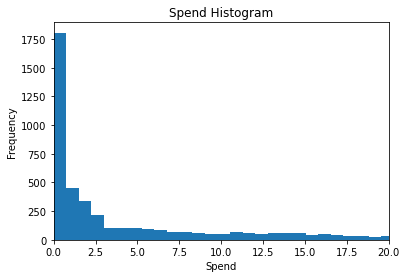

In [936]:
plt.figure()
plt.hist(chill_burger['spend'], bins = 1000)
plt.title('Spend Histogram')
plt.xlim([0, 20])
plt.ylabel('Frequency')
plt.xlabel('Spend')
plt.show()

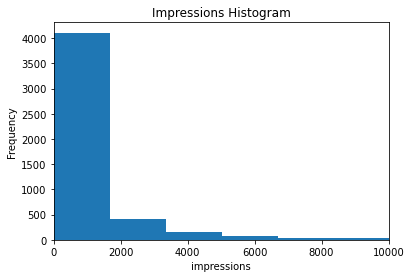

In [938]:
plt.figure()
plt.hist(chill_burger['impressions'], bins = 100)
plt.title('Impressions Histogram')
plt.xlim([0, 10000])
plt.ylabel('Frequency')
plt.xlabel('impressions')
plt.show()

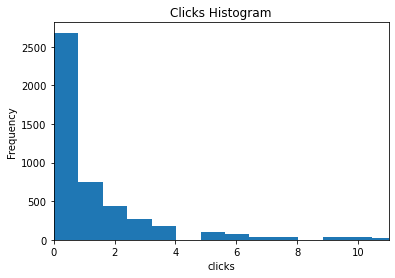

In [939]:
plt.figure()
plt.hist(chill_burger['clicks'], bins = 500)
plt.title('Clicks Histogram')
plt.xlim([0, 11])
plt.ylabel('Frequency')
plt.xlabel('clicks')
plt.show()

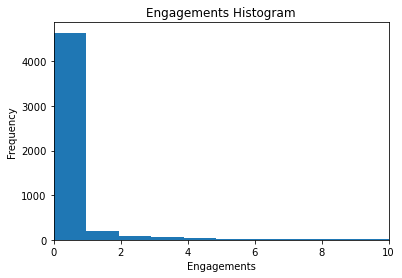

In [940]:
plt.figure()
plt.hist(chill_burger['engagements'], bins = 100)
plt.title('Engagements Histogram')
plt.xlim([0, 10])
plt.ylabel('Frequency')
plt.xlabel('Engagements')
plt.show()

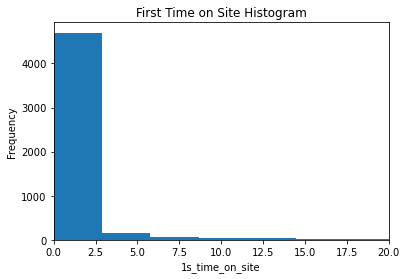

In [941]:
plt.figure()
plt.hist(chill_burger['1s_time_on_site'], bins = 100)
plt.title('First Time on Site Histogram')
plt.xlim([0, 20])
plt.ylabel('Frequency')
plt.xlabel('1s_time_on_site')
plt.show()

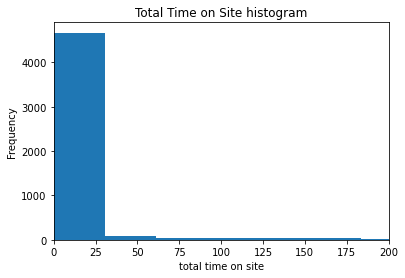

In [942]:
plt.figure()
plt.hist(chill_burger['total_time_on_site'], bins = 600)
plt.title('Total Time on Site histogram')
plt.xlim([0, 200])
plt.ylabel('Frequency')
plt.xlabel('total time on site')
plt.show()

Initial Insights:

* Visually, we can see that the classes are heavily unbalanced and the distribution is right-skewed. 

Lets check out some boxplot to visualize the outliers.

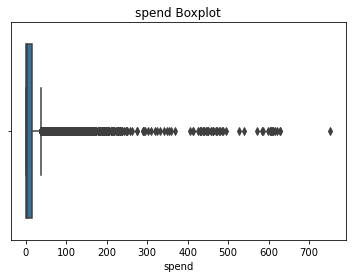

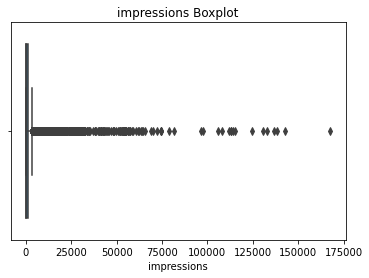

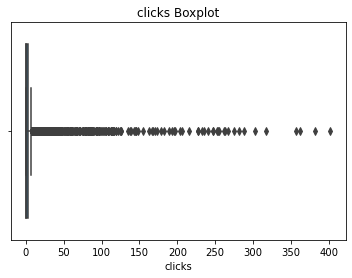

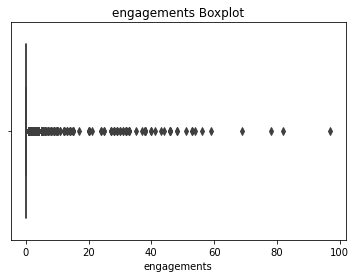

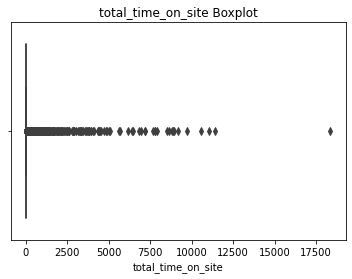

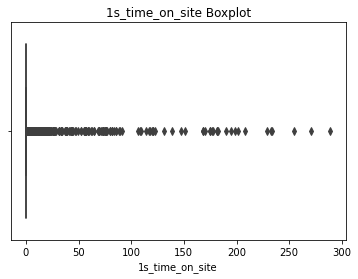

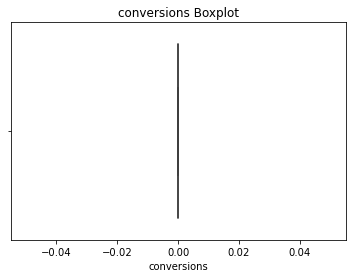

In [786]:
parameters = ['spend', 'impressions', 'clicks', 'engagements', '1s_time_on_site', 'total_time_on_site']

# plot
for i, parameter in enumerate(parameters):
    
    plt.figure()
    sns.boxplot(x = parameter, data = chill_burger)
    plt.title(parameter + ' Boxplot')
    plt.show()

Initial Insights:
* We can see that there are tons of outliers 

Lets check out some scatter plots with `spend` on the y-axis. 

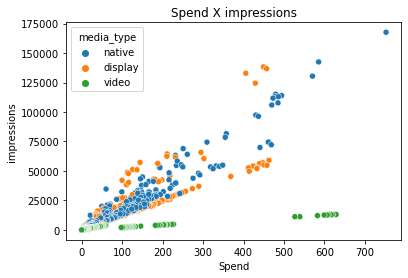

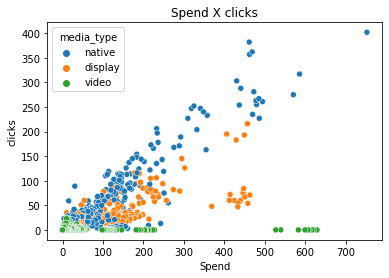

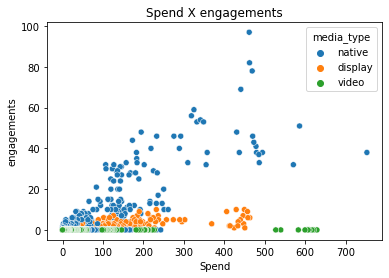

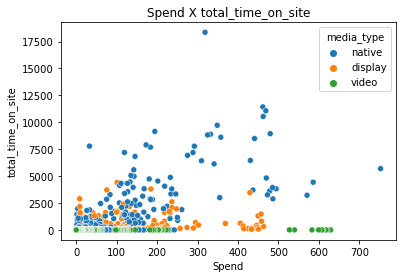

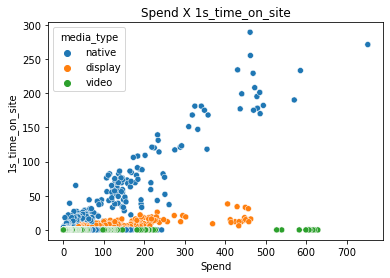

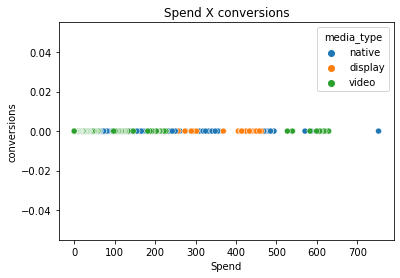

In [788]:
# hue media_type
parameters = ['impressions', 'clicks', 'engagements', 'total_time_on_site', '1s_time_on_site', 'conversions']

for parameter in parameters:
    plt.figure()
    sns.scatterplot(x = 'spend', y = parameter, hue = 'media_type', data = chill_burger)
    plt.xlabel('Spend')
    plt.ylabel(parameter)
    plt.title('Spend X ' + parameter)
    plt.show()

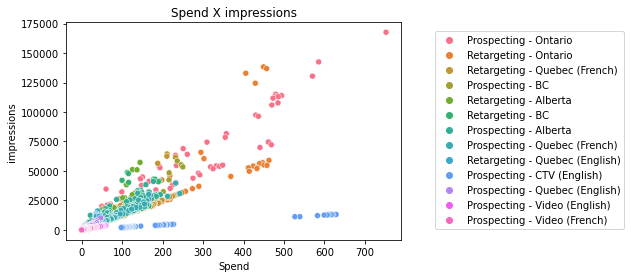

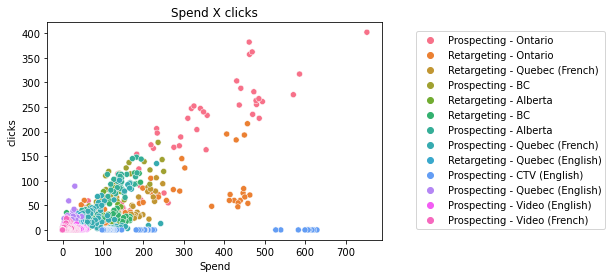

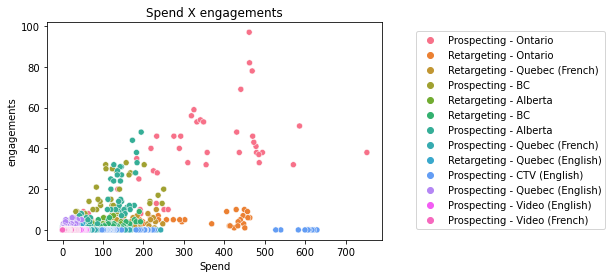

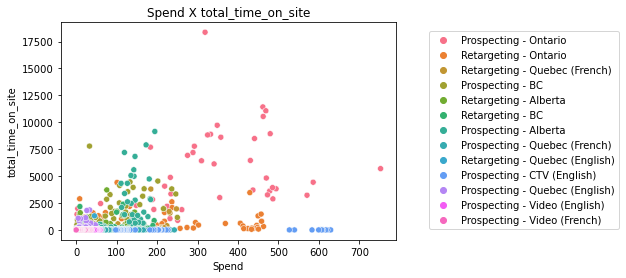

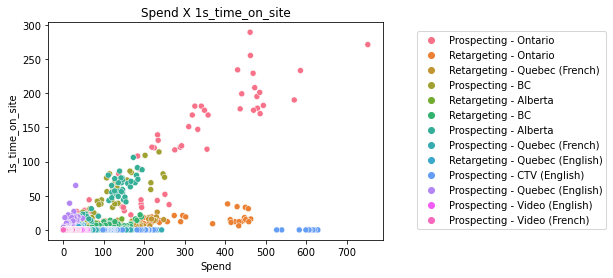

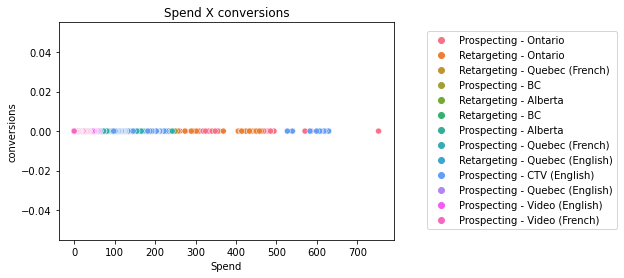

In [789]:
# hue campaign_name
parameters = ['impressions', 'clicks', 'engagements', 'total_time_on_site', '1s_time_on_site', 'conversions']

for parameter in parameters:
    plt.figure()
    sns.scatterplot(x = 'spend', y = parameter, hue = 'campaign_name', data = chill_burger)
    plt.xlabel('Spend')
    plt.ylabel(parameter)
    plt.title('Spend X ' + parameter)
    plt.legend(loc=(1.1, 0.05))
    plt.show()

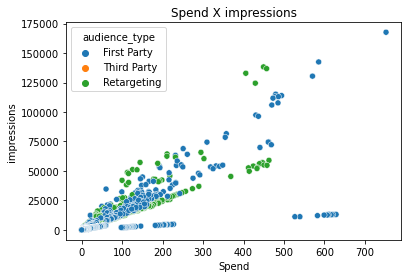

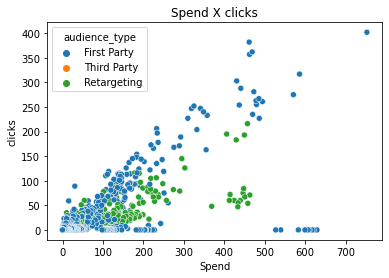

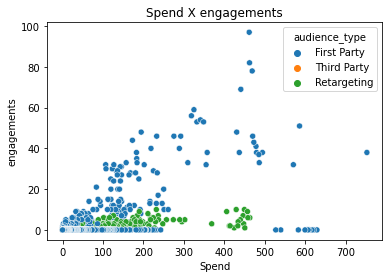

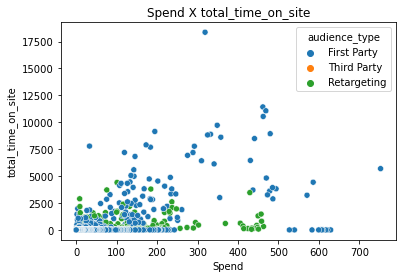

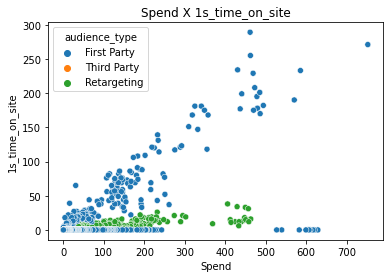

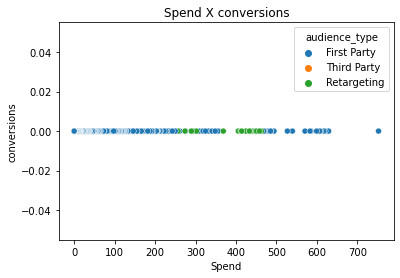

In [790]:
# hue audience_type
parameters = ['impressions', 'clicks', 'engagements', 'total_time_on_site', '1s_time_on_site', 'conversions']

for parameter in parameters:
    plt.figure()
    sns.scatterplot(x = 'spend', y = parameter, hue = 'audience_type', data = chill_burger)
    plt.xlabel('Spend')
    plt.ylabel(parameter)
    plt.title('Spend X ' + parameter)
    plt.show()

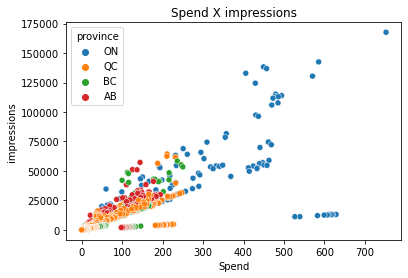

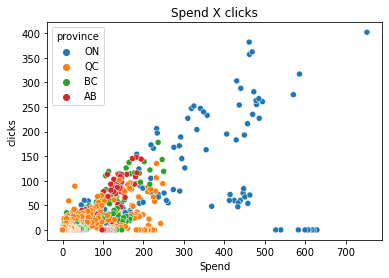

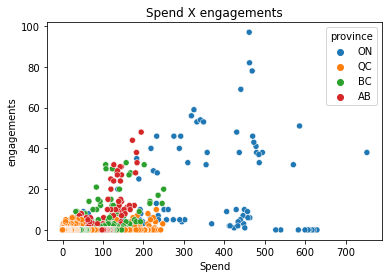

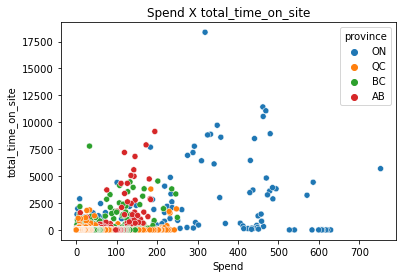

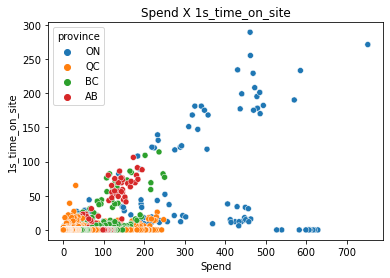

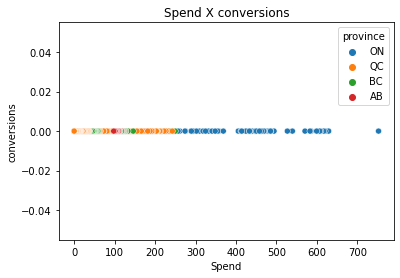

In [791]:
# hue province
parameters = ['impressions', 'clicks', 'engagements', 'total_time_on_site', '1s_time_on_site', 'conversions']

for parameter in parameters:
    plt.figure()
    sns.scatterplot(x = 'spend', y = parameter, hue = 'province', data = chill_burger)
    plt.xlabel('Spend')
    plt.ylabel(parameter)
    plt.title('Spend X ' + parameter)
    plt.show()

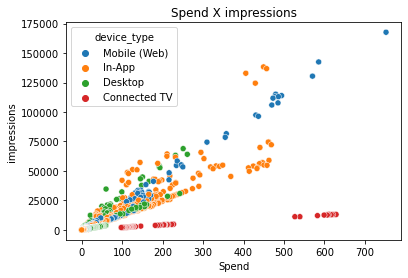

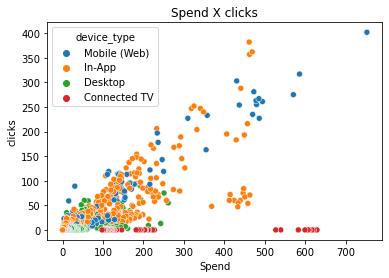

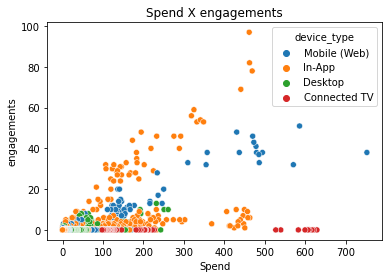

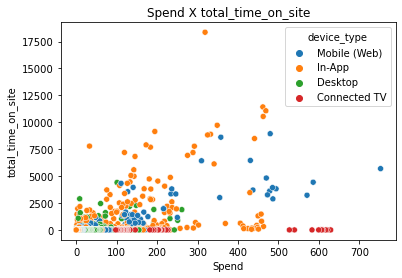

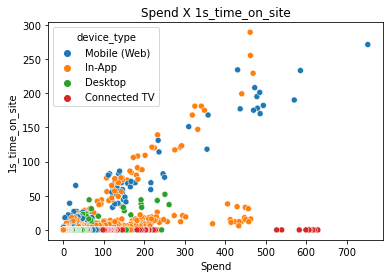

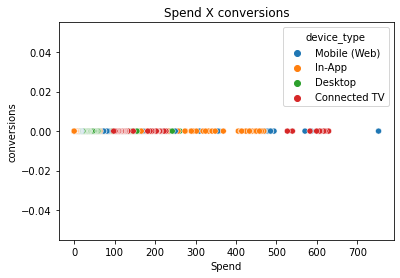

In [792]:
# hue device type
parameters = ['impressions', 'clicks', 'engagements', 'total_time_on_site', '1s_time_on_site', 'conversions']

for parameter in parameters:
    plt.figure()
    sns.scatterplot(x = 'spend', y = parameter, hue = 'device_type', data = chill_burger)
    plt.xlabel('Spend')
    plt.ylabel(parameter)
    plt.title('Spend X ' + parameter)
    plt.show()

### Task 2: Provide overall summary slides of advertisers and calculate meaningful KPIs (ex: CPM, CPC, CTR, etc) - Chill Burger

#### CPM  - Cost Per Thousand (Impressions)

To calculate CPM, we need to calculate the total impressions and total spent for Chill Burger. 

In [793]:
chill_burger.columns

Index(['date', 'advertiser_id', 'advertiser_name', 'campaign_id',
       'campaign_name', 'media_type', 'creative_id', 'creative_name',
       'creative_size', 'landing_page', 'video_duration', 'country',
       'province', 'video_type', 'device_type', 'demo_gender', 'demo_age',
       'audience_id', 'audience_name', 'audience_type', 'spend', 'impressions',
       'clicks', 'engagements', 'total_time_on_site', '1s_time_on_site',
       'conversions', 'video_started', 'video_completed_25',
       'video_completed_50', 'video_completed_75', 'video_completed'],
      dtype='object')

In [794]:
# We exclude connected tv because it doesn't generate impressions
chill_burger = df[(df['advertiser_name'] == 'Chill Burger') & (df['device_type'] != 'Connected TV')]

# total impressions
total_impressions = chill_burger['impressions'].sum()
print(f'Total Impressions: {total_impressions}')

# total spent
total_spent = chill_burger['spend'].sum()
print(f'Total Spent: {total_spent}')

print('\n')

CPM = (1000 * (total_spent / total_impressions)).round(2)   
print(f'CPM: ${CPM}')

Total Impressions: 14681796
Total Spent: 94163.663817


CPM: $6.41


#### CPC - Cost Per Click 

To calculate CPM, we need to calculate the total clicks and total spent for Chill Burger.

In [795]:
# total clicks 
total_clicks = chill_burger['clicks'].sum()
print(f'Total Clicks: {total_clicks}')
print(f'Total Spent: {total_spent}')

print('\n')
CPC = (total_spent / total_clicks).round(2)
print('Google Ads Benchmark - CPC: $1.00')
print(f'CPC: ${CPC}')

Total Clicks: 34605
Total Spent: 94163.663817


Google Ads Benchmark - CPC: $1.00
CPC: $2.72


#### CTR - Click Through Rate 

CTR is the rate at which your PPC ads are clicked. This number is the % of people who view your ad (impressions) and then actually go on to click the ad (clicks). 

To calculate CTR, we need to calculate the total clicks and total impressions for Chill Burger.

In [943]:
CTR = ((total_clicks / total_impressions) * 100).round(2)
print(f'Total Clicks: {total_clicks}')
print(f'Total Impressions: {total_impressions}')
print('\n')

print(f'CTR: {CTR}%')

Total Clicks: 7854
Total Impressions: 5915777


CTR: 0.13%


#### Impressions by Campaign

The total number of impressions segmented by each campaign you have running.

In [797]:
print('Current Campaigns for Chill Burger:')
chill_burger['campaign_name'].unique().tolist()

Current Campaigns for Chill Burger:


['Prospecting - Ontario',
 'Retargeting - Ontario',
 'Retargeting - Quebec (French)',
 'Prospecting - BC',
 'Retargeting - Alberta',
 'Retargeting - BC',
 'Prospecting - Alberta',
 'Prospecting - Quebec (French)',
 'Retargeting - Quebec (English)',
 'Prospecting - CTV (English)',
 'Prospecting - Quebec (English)',
 'Prospecting - Video (English)',
 'Prospecting - Video (French)']

In [798]:
chill_campaign_impressions = chill_burger.groupby('campaign_name')[['impressions', 'spend']].sum()
total_spend_per_campaign = chill_burger.groupby('campaign_name')['spend'].sum().tolist()

In [799]:
chill_pct_total_spend_campaigns = []
for spend in total_spend_per_campaign:
    pct = (spend / total_spent * 100).round(2)
    chill_pct_total_spend_campaigns.append(pct)

chill_campaign_impressions['% Total Spend'] = chill_pct_total_spend_campaigns

In [800]:
chill_campaign_impressions.sort_values(by='impressions', ascending=False)

,impressions,spend,% Total Spend
campaign_name,,,
Prospecting - Ontario,3513609,16303.737198,17.31
Retargeting - Ontario,2483200,15514.839985,16.48
Prospecting - Quebec (French),1372249,9271.647210,9.85
Retargeting - Quebec (French),1251204,7993.489750,8.49
Prospecting - BC,1187385,5920.271195,6.29
Prospecting - Alberta,1128232,5600.093956,5.95
Prospecting - Video (English),994365,14800.296846,15.72
Retargeting - BC,976980,5929.380549,6.30
Retargeting - Alberta,954273,5574.761399,5.92


### Newly Balanced Descriptive Stats

In [955]:
# create newly_balanced dataframe
newly_balanced = df[df['advertiser_name'] == 'Newly Balanced']

In [829]:
df[df['advertiser_name'] == 'Newly Balanced'][['spend', 'impressions', 'clicks', 'engagements', \
                                               'total_time_on_site', '1s_time_on_site', 'conversions']].describe().round(2)

,spend,impressions,clicks,engagements,total_time_on_site,1s_time_on_site,conversions
count,39654.00,39654.00,39654.00,39654.00,39654.00,39654.00,39654.00
mean,0.34,149.18,0.20,0.04,9.70,0.12,0.01
std,1.91,694.26,1.15,0.28,148.97,0.73,0.07
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.01,6.00,0.00,0.00,0.00,0.00,0.00
50%,0.05,21.00,0.00,0.00,0.00,0.00,0.00
75%,0.18,87.00,0.00,0.00,0.00,0.00,0.00
max,91.76,34223.00,56.00,10.00,7239.00,25.00,2.00


Newly Balanced did not choose to run any Connected TV Ads

In [802]:
df[(df['advertiser_name'] == 'Newly Balanced') & (df['device_type'] == 'Connected TV')] 

,date,advertiser_id,advertiser_name,campaign_id,campaign_name,media_type,creative_id,creative_name,creative_size,landing_page,...,clicks,engagements,total_time_on_site,1s_time_on_site,conversions,video_started,video_completed_25,video_completed_50,video_completed_75,video_completed


Initial Insights:
* Tons of outliers for all parameters 
* Spend and Impressions are likely to between left or right skew. Not a normal distribution. 
* High STD for impressions because high range interval
* Newly Balanced did not run any video ads

Let's plot some histograms.

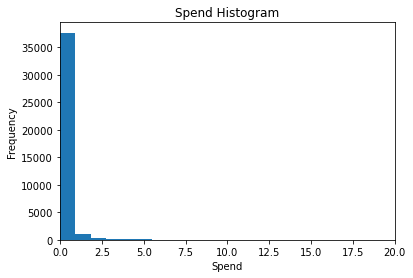

In [959]:
plt.figure()
plt.hist(newly_balanced['spend'], bins = 100)
plt.title('Spend Histogram')
plt.xlim([0, 20])
plt.ylabel('Frequency')
plt.xlabel('Spend')
plt.show()

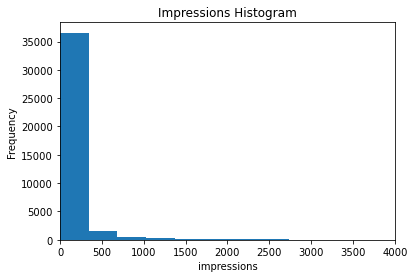

In [960]:
plt.figure()
plt.hist(newly_balanced['impressions'], bins = 100)
plt.title('Impressions Histogram')
plt.xlim([0, 4000])
plt.ylabel('Frequency')
plt.xlabel('impressions')
plt.show()

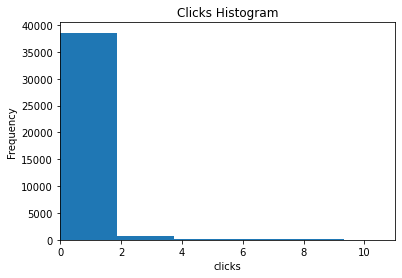

In [965]:
plt.figure()
plt.hist(newly_balanced['clicks'], bins = 30)
plt.title('Clicks Histogram')
plt.xlim([0, 11])
plt.ylabel('Frequency')
plt.xlabel('clicks')
plt.show()

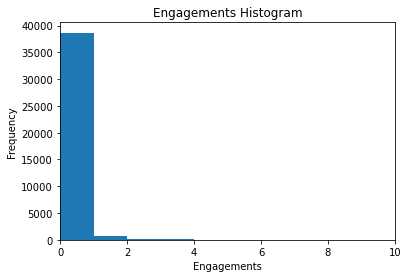

In [968]:
plt.figure()
plt.hist(newly_balanced['engagements'])
plt.title('Engagements Histogram')
plt.xlim([0, 10])
plt.ylabel('Frequency')
plt.xlabel('Engagements')
plt.show()

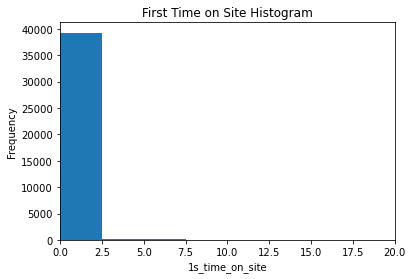

In [972]:
plt.figure()
plt.hist(newly_balanced['1s_time_on_site'])
plt.title('First Time on Site Histogram')
plt.xlim([0, 20])
plt.ylabel('Frequency')
plt.xlabel('1s_time_on_site')
plt.show()

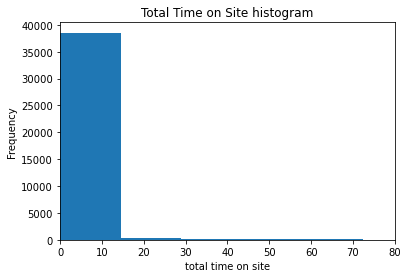

In [976]:
plt.figure()
plt.hist(newly_balanced['total_time_on_site'], bins = 500)
plt.title('Total Time on Site histogram')
plt.xlim([0, 80])
plt.ylabel('Frequency')
plt.xlabel('total time on site')
plt.show()

Initial Insights:
* Visually, we can see that the classes are heavily unbalanced and the distribution is right-skewed.


Lets check out some boxplot to visualize the outliers.

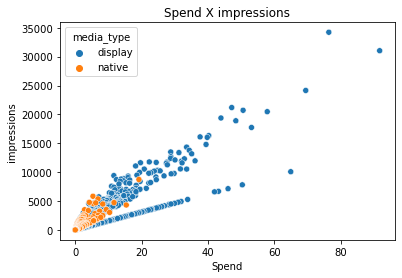

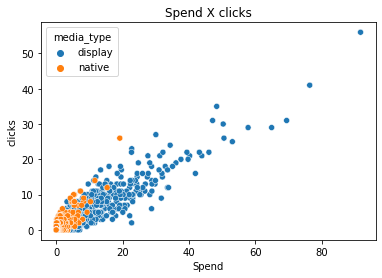

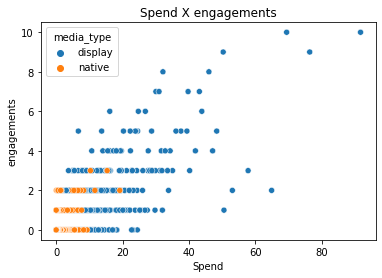

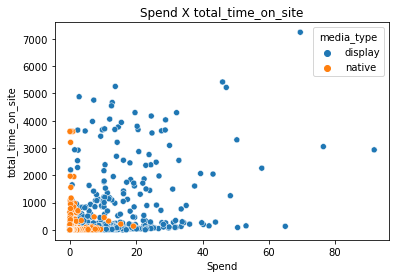

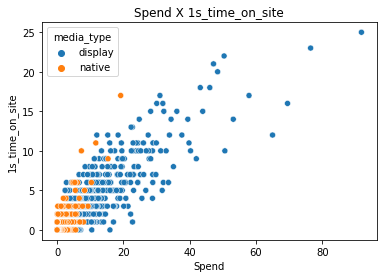

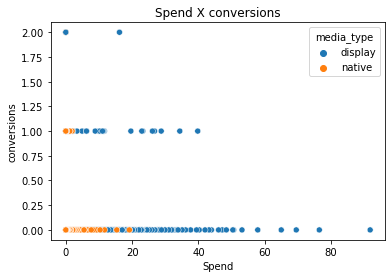

In [804]:
# hue media_type
parameters = ['impressions', 'clicks', 'engagements', 'total_time_on_site', '1s_time_on_site', 'conversions']

for parameter in parameters:
    plt.figure()
    sns.scatterplot(x = 'spend', y = parameter, hue = 'media_type', data = newly_balanced)
    plt.xlabel('Spend')
    plt.ylabel(parameter)
    plt.title('Spend X ' + parameter)
    plt.show()

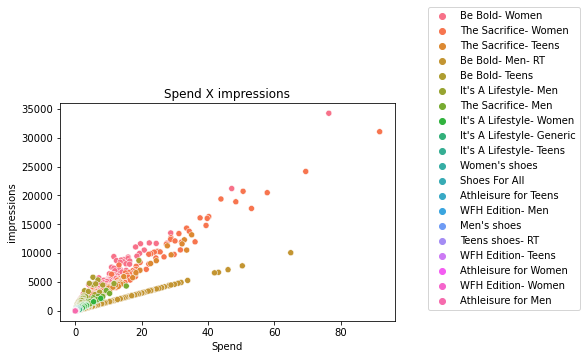

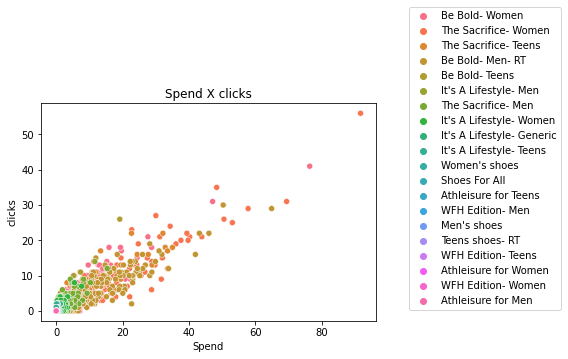

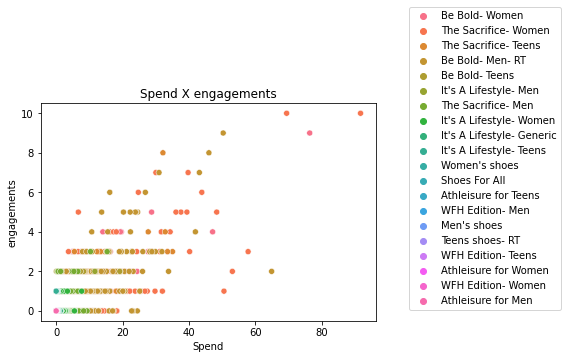

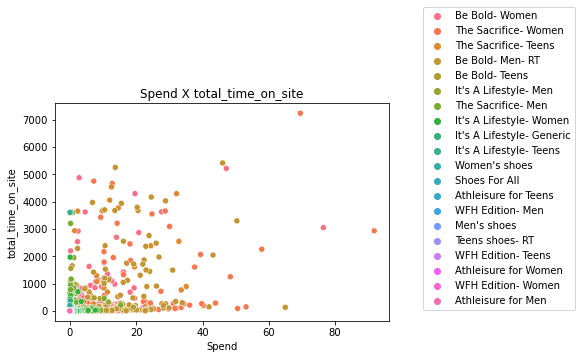

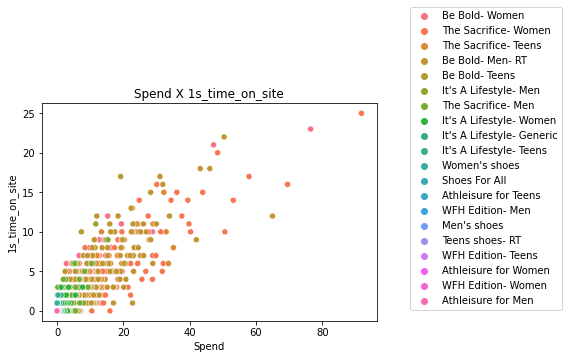

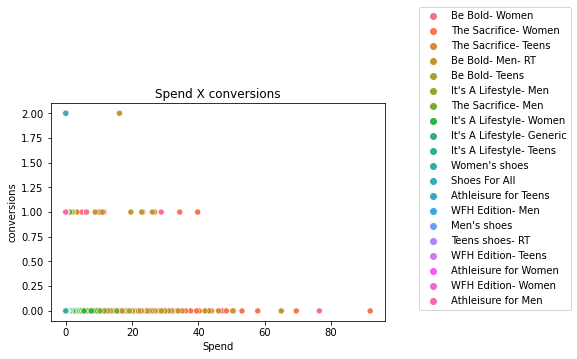

In [805]:
# hue campaign_name
parameters = ['impressions', 'clicks', 'engagements', 'total_time_on_site', '1s_time_on_site', 'conversions']

for parameter in parameters:
    plt.figure()
    sns.scatterplot(x = 'spend', y = parameter, hue = 'campaign_name', data = newly_balanced)
    plt.xlabel('Spend')
    plt.ylabel(parameter)
    plt.title('Spend X ' + parameter)
    plt.legend(loc=(1.1, 0.05))
    plt.show()

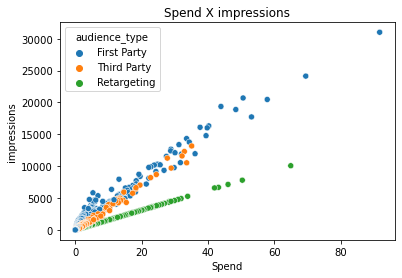

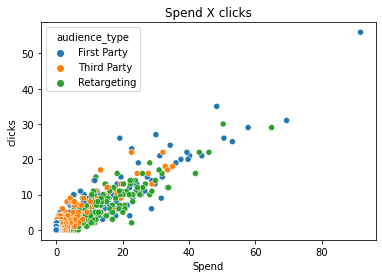

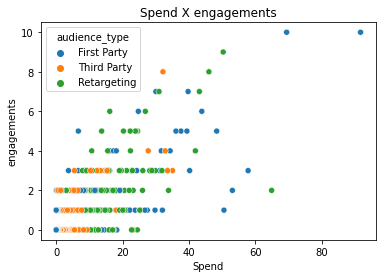

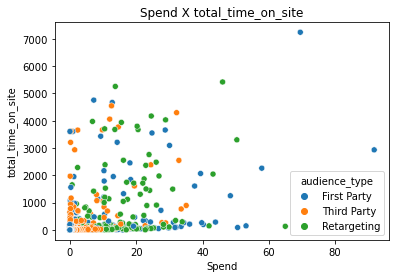

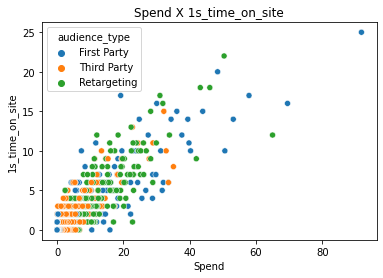

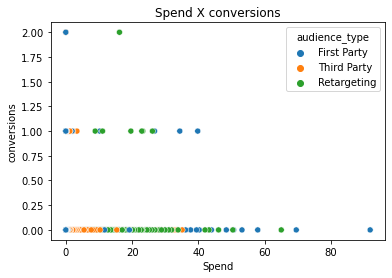

In [806]:
# hue audience_type
parameters = ['impressions', 'clicks', 'engagements', 'total_time_on_site', '1s_time_on_site', 'conversions']

for parameter in parameters:
    plt.figure()
    sns.scatterplot(x = 'spend', y = parameter, hue = 'audience_type', data = newly_balanced)
    plt.xlabel('Spend')
    plt.ylabel(parameter)
    plt.title('Spend X ' + parameter)
    plt.show()

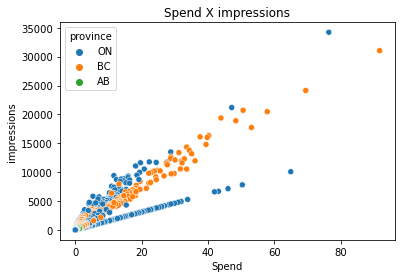

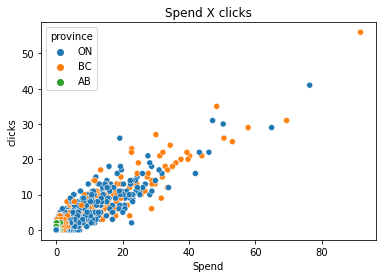

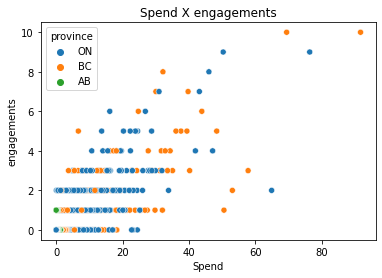

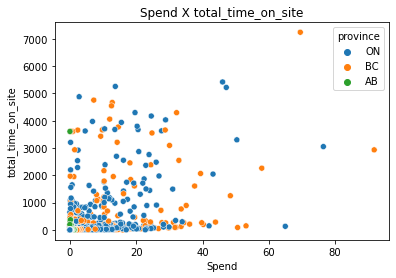

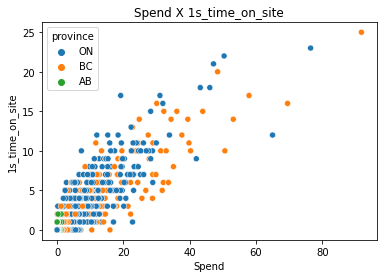

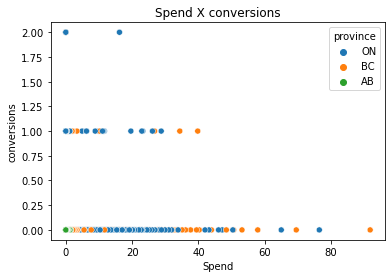

In [807]:
# hue province
parameters = ['impressions', 'clicks', 'engagements', 'total_time_on_site', '1s_time_on_site', 'conversions']

for parameter in parameters:
    plt.figure()
    sns.scatterplot(x = 'spend', y = parameter, hue = 'province', data = newly_balanced)
    plt.xlabel('Spend')
    plt.ylabel(parameter)
    plt.title('Spend X ' + parameter)
    plt.show()

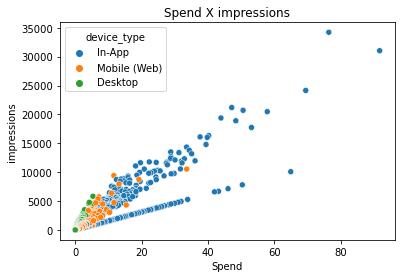

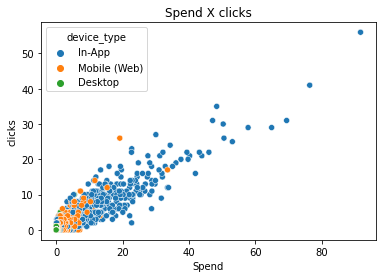

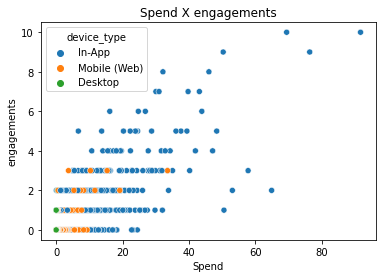

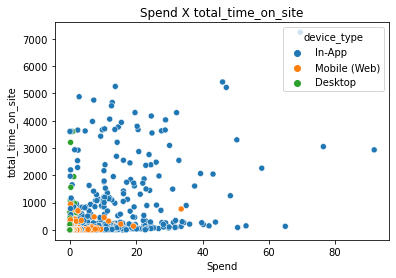

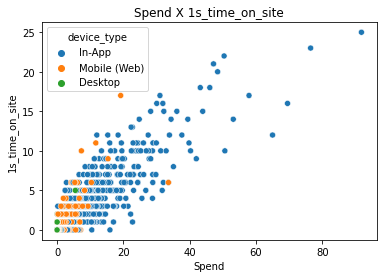

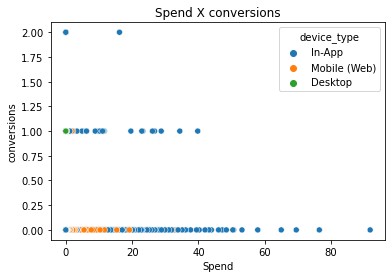

In [808]:
# hue device_type
parameters = ['impressions', 'clicks', 'engagements', 'total_time_on_site', '1s_time_on_site', 'conversions']

for parameter in parameters:
    plt.figure()
    sns.scatterplot(x = 'spend', y = parameter, hue = 'device_type', data = newly_balanced)
    plt.xlabel('Spend')
    plt.ylabel(parameter)
    plt.title('Spend X ' + parameter)
    plt.show()

### Task 2: Provide overall summary slides of advertisers and calculate meaningful KPIs (ex: CPM, CPC, CTR, etc) - Newly Balanced

#### CPM  - Cost Per Thousand (Impressions)

In [809]:
newly_balanced = df[(df['advertiser_name'] == 'Newly Balanced')]

# total impressions
total_impressions = newly_balanced['impressions'].sum()
print(f'Total Impressions: {total_impressions}')

# total spent
total_spent = newly_balanced['spend'].sum()
print(f'Total Spent: {total_spent}')

print('\n')

CPM = (1000 * (total_spent / total_impressions)).round(2)  
print(f'CPM: ${CPM}')

Total Impressions: 5915777
Total Spent: 13485.698802


CPM: $2.28


#### CPC - Cost Per Click

In [828]:
# total clicks 
total_clicks = newly_balanced['clicks'].sum()
print(f'Total Clicks: {total_clicks}')
print(f'Total Spent: {total_spent}')

print('\n')
CPC = (total_spent / total_clicks).round(2)
print(f'CPC: ${CPC}')

Total Clicks: 7854
Total Spent: 13485.698802


CPC: $1.72


#### CTR - Click Through Rate

In [830]:
CTR = ((total_clicks / total_impressions) * 100).round(2)
print(f'Total Clicks: {total_clicks}')
print(f'Total Impressions: {total_impressions}')
print('\n')

print(f'CTR: {CTR}%')

Total Clicks: 7854
Total Impressions: 5915777


CTR: 0.13%


#### Impressions by Campaign

In [813]:
print('Current Campaigns for Newly Balanced:')
newly_balanced['campaign_name'].unique().tolist()

Current Campaigns for Newly Balanced:


['Be Bold- Women',
 'The Sacrifice- Women',
 'The Sacrifice- Teens ',
 'Be Bold- Men- RT',
 'Be Bold- Teens',
 "It's A Lifestyle- Men",
 'The Sacrifice- Men',
 "It's A Lifestyle- Women",
 "It's A Lifestyle- Generic",
 "It's A Lifestyle- Teens",
 "Women's shoes",
 'Shoes For All',
 'Athleisure for Teens',
 'WFH Edition- Men',
 "Men's shoes",
 'Teens shoes- RT',
 'WFH Edition- Teens',
 'Athleisure for Women',
 'WFH Edition- Women',
 'Athleisure for Men']

In [814]:
nb_campaign_impressions = newly_balanced.groupby('campaign_name')[['impressions', 'spend']].sum()
total_spend_per_campaign = newly_balanced.groupby('campaign_name')['spend'].sum().tolist()

In [815]:
nb_pct_total_spend_campaigns = []
for spend in total_spend_per_campaign:
    pct = (spend / total_spent * 100).round(2)
    nb_pct_total_spend_campaigns.append(pct)
nb_campaign_impressions['% Total Spend'] = nb_pct_total_spend_campaigns

In [816]:
nb_campaign_impressions.sort_values(by='impressions', ascending=False)

,impressions,spend,% Total Spend
campaign_name,,,
Be Bold- Women,1512003,2289.832592,16.98
The Sacrifice- Women,1198333,2703.080465,20.04
Be Bold- Teens,936008,1215.869953,9.02
It's A Lifestyle- Men,599871,852.122910,6.32
Be Bold- Men- RT,487971,3142.635131,23.30
The Sacrifice- Men,474023,1397.291821,10.36
The Sacrifice- Teens,419628,1148.920781,8.52
It's A Lifestyle- Women,168057,492.303501,3.65
It's A Lifestyle- Teens,72182,105.668129,0.78


# Analysis 

### Task 3: Build insightful charts when answering the following questions:    

**Analyze age categories for "Newly Balanced" Display campaigns. Indicate the best performers and provide insights based on your findings.**

To best analyze the `Newly Balanced` Dataset, we will remove the following campaigns: 
* Athleisure for Men
* WFH Edition- Women
* WFH Edition- Teens
* WFH Edition- Men
* Men's shoes	
* Teens shoes- RT
* Shoes For All
* Athleisure for Teens	
* Athleisure for Women
* Women's shoes

The campaigns above had 0 impressions and 0 spend. In addition, the `demo_age` was also NaN. 

In [817]:
print(f'Newly Balanced Dataset Shape: {newly_balanced.shape}')
newly_balanced['demo_age'].unique()

Newly Balanced Dataset Shape: (39654, 32)


array(['25+', '25-34', '45-54', '55-64', '35-44', '65+', nan],
      dtype=object)

In [818]:
newly_balanced = newly_balanced[(newly_balanced['impressions'] != 0) & ((newly_balanced['spend'] != 0) | (newly_balanced['spend'] != 0.0))]

# sanity check
print(f'New Dataframe Shape: {newly_balanced.shape}')

newly_balanced['demo_age'].unique()

New Dataframe Shape: (39515, 32)


array(['25+', '25-34', '45-54', '55-64', '35-44', '65+'], dtype=object)

We have cleaned up the `demo_age` rows so no NaNs exist. 

In [819]:
# Export newly_balanced dataframe to CSV file
# newly_balanced.to_csv('newly_balanced.csv', index=False)

Best Performers:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The Best Performers is the `Be Bold- Women` and `The Sacrifice- Teens` Campaign with the lowest CPC at \\$1.54 and \\$1.74 respectively.

Insights/Recommendations: 

*Overall* 
* We have a `demo_age` of '25+' bin, we should ignore those results because the bin is ambiguous. The range could be 25-65+ or less. 
* `Be Bold- Men- RT` campaign has an extremely high CPM at $6.44. It is recommended to review the CPM and check for factors that affect CPM such as device, ad size, and past performance. Perhaps the CPM is appropriate for this demographic. 
* The average CPC is higher than the Industry Benchmark at `$1.00 - $1.20`. We need focus targeting on groupings with lower CPC to lower the overall CPC. 
* The average CTR is also low. We want to reach a KPI of `0.35%`. Once we lower the CPC, we can then revist this KPI.  
* Assuming the 1S Time On Site is in seconds, the average 1S Time on Site is very low at 0 seconds. There is only 1 landing page for each campaign. It is recommended to review and revise landing page to increase site participation. 
* Women demographic seems to the primary target demographic. I agree with this target group because the men demographic is very expensive in terms of CPC. 

*25-34*
* `The Sacrifice- Teen` campagin has the lowest spend in this range but has the lowest CPC at $1.63. It is recommend to investigate and increase targeting for this campagin at this range as the CTR is also the second highest. 


*35-44* 
* `Be Bold- Women` campaign has the lowest CPC at $1.40. I recommend to increase targeting for this campaign at this age-range. 

*45-54*
* I recommend to reduce targeting for `The Sacrifice- Women` and increasing targeting for `Be Bold- Women` campaign. The CPC for Be-Bold is 25% lower. It would be optimal explore deeper into the groups to see which group yields a lower overall CPC. 
* I also recommend increase targeting for `The Sacrifice- Teens` and do a deeper analysis. The CTR is higher than `The Sacrifice- Women`.   

*55-64* 
* `Be Bold- Women` campaign has the lowest CPC of all the age ranges at $1.33. I recommend to increase targeting for this campaign at this age-range. It would be optimal explore deeper into the groups to see which group yields a lower overall CPC. 

*65+*
* Lower spend across the all the age ranges. 
* The average CPC across the campagins is also relatively higher than the rest. I recommend not focusing too much on this target age group. 
* `Be Bold- Women` campaign is the best performing with a CPC at $1.76. It would be optimal explore deeper into the groups to see which group yields a lower overall CPC. 





**Using the "Newly Balanced" dataset, analyze overall Native campaign performance and indicate the top performing theme.**

Best Performer:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The top performing theme is under the `Be Bold- Teens` campaign: `Be Bold, Be You`. The CPC of this theme is $1.17 and has 6 `Conversions`. 

Insights/Recommendations:

* Native has better average CPC than the Display Counterparts
* Native campaign seem to work better on Teen demographic. `Be Bold- Teens` and `It's A Lifestyle- Teens` both have the lowest CPC. I recommend increase targeting for these campaigns. It would be optimal explore deeper into the groups to see which group yields a lower overall CPC.
* Assuming the 1S Time On Site is in seconds, the average 1S Time on Site is very low at 0 seconds. There is only 1 landing page for each campaign. It is recommended to review and revise landing page to increase site participation.


**Using the "Chill Burger" dataset, conduct a day parting analysis and indicate what day of the week performed best for Native campaigns. Provide recommendations to improve the performance of this advertiser.**   


Assumptions:
* Each Impression represents one video ad played 
* If Total `Video Started` is lower than Total `Impressions`, the Viewer switched off the ad immediately and that `Impression` does not count towards Total `Video Started`. 
* [Video Retention Benchmark Rate](https://databox.com/audience-retention-youtube) - 50% - 60% 

`Initial Retention Rate` - Total Video Started / Total Impressions <br></br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This allows us to see the rate that a Viewer does not switch off the ad immediately and reaches to less 25% of the video.  

`Completed Rate` - Total Video Completed / Total Impressions <br></br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This allows us to see the rate that a Viewer completes the video from start to finish.

Insights / Recommendations:
* Saturday is the best day of the week for Native Campaigns. Its recommendated to maximizing targeting on Saturday. 
* Saturday, Sunday, and Monday is the best days for targeting. 
* Reduce targeting on Tuesday. Tuesday has the highest CPC. 

**Analyze the different device types and indicate the best performers using "Chill Burger" Display campaign data.**

In [ ]:
# Export chill_burger dataframe
chill_burger = df[(df['advertiser_name'] == 'Chill Burger')]
chill_burger.to_csv('chill_burger.csv', index=False)

Best Performer:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The Best Overall Performer is the `Prospecting - Ontario` campaign with a CPC of \\$1.68.

Insights/Recommendations: 

*General*
* `Prospecting - BC/AB` both has lower CPC and CPM compared to the rest. The CTR also close the KPI. I recommend increase targeting for these two campaigns and explore deeper into the groups to see which group yields a lower overall CPC.

* `Prospecting - CTV (English)` has the highest CPC and CPM at \\$7.14 and \\$42.13 respectively. Given the nature of CTV/Video campaigns, we expect those values to be high but we see re-evaluate if those values fall into acceptable ranges. 

*Connected TV* 
* `Prospecting - CTV(English) takes a considerable budget. It has a 96.15% video completion rate. 

*Desktop*
* `Prospecting - Video (English)` has the highest spent and high CPC and CPM. Based on the results, it is recommended to reduce targeting for this campaign. Other campaigns yield better results at cheaper prices. 

* `Prospecting - Quebec (French)` is a  low performing campaign. The CPC and CPM and especially the CTR is low compared to the other compaigns. I recommend to focus targeting on other campaigns more. 

* `Retargeting - Quebec (French)` is performing alot better than its former. It is recommended to continue testing out with this retargeting compaign. We still need to refine the targeting. It is recommended to continue explore deeper into the groups to see which group yields a lower overall CPC. 

*In-App*
* In-App seems to perform well for Chill Burger
* `Retargeting- Ontario` did not perform better than its former. It is recommended to revert back to Prospecting- Ontario. 
* `Prospecting - Ontario/BC/AB/QB needs to continue deeper exploration into the groups to see which group yields lower overall CPC. The CPC is close the KPI goal and the CTR is performs better than our KPI goal. I recommend to continue focusing on these groups. 

*Mobile(Web)*
* `Retargeting - Quebec (French)` campaign did not perform as well as the former. The CPC is up 175% from the original CPC. It is recommended to reverting to the former campaign. 
* `Prospecting - Quebec (English)` campaign performs better than the Quebec (French) campaign. The English campaign has 95% lower difference in CPC. I recommended reduce some targeting for the French verison and move it to the English version. 

**How can you improve performance for Video campaigns for "Chill Burger"?**

To suggest improvements on the performance of the Video campaigns, we need to do a deeper dive on the performance per province and device type. We use `CTR`, `Initial Retention Rate`, and `Completed Rate` as the main performance metrics.

Assumptions:
* Each Impression represents one video ad played 
* If Total `Video Started` is lower than Total `Impressions`, the Viewer switched off the ad immediately and that `Impression` does not count towards Total `Video Started`. 
* [Video Retention Benchmark Rate](https://databox.com/audience-retention-youtube) - 50% - 60% 

`Initial Retention Rate` - Total Video Started / Total Impressions <br></br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This allows us to see the rate that a Viewer does not switch off the ad immediately and reaches to less 25% of the video.  

`Completed Rate` - Total Video Completed / Total Impressions <br></br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This allows us to see the rate that a Viewer completes the video from start to finish. 

We can use `Prospecting - Video (English)` and the `NEW - Crunchy Chicken` for an example.

Insights/Recommendations:
* The highlighted values in red means that the completed rate is under 50%. 
* For the province of AB, `Mobile(Web)` has the 2nd highest spend but In-App has a higher CTR. We should target more for the In-App device type. The CPC is also lower for `In-App`. 
* For the province of QB, `Mobile(Web)` has the 2nd highest spend but In-App has a higher CTR. We should target more for the In-App device type. The CPC is also lower for `In-App`.
* In general, `In-App` seems to be high performer for CTR. Its best focus targeting `In-App`. 
* QB is the best performing province but has the lowest budget. We should increase targeting to the province of QB. 


**How can you improve CPC for Native campaigns based on the industry benchmarks provided?** 

The Industry Benchmark provided was `CPC: $1.00 - $1.20`. 

To improve the CPC of Native campaigns we need to a dive deep on a specific campaign. For instance, I will use `Chill Burger`'s `Prospecting - Ontario` campaign, the most spent campaign, for an example. The overall CPC for that campaign is $1.68. To analyze the campaign we need to break the campaign into parts. We split the campaign by landing page, creative name, audience name and device type. 

To reduce the overall CPC, we need to retarget the chain groupings in blue. The red highlighted values indicates CPC values over the Industry Benchmark. 

Insights/Recommendations: 
* `Ways to Make it a Combo` landing page is the more efficient landing page. This landing page has Industry Benchmark CPC that cover all the device types and more chain grouping options to reduce CPC overall.  
* Increase targeting for chain groupings in blue to reduce overall CPC
* The `Ice Cream Treat` creative name is a very expensive. The overall CPC is too high. I would recommend revising the creative. 
* The budget for `Ice Cream Treat` creative is also very high. We need allocate the budget to other creatives such as `Beef Burger Supreme`. 
* In general the CPC for mobile device tends to be lower. I would recommend to allocate more targeting to mobile devices. 

**Discuss the conversion performance for "Newly Balanced".**

`KPI - CTR: 0.35%`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;CTR is the rate at which your PPC ads are clicked. This number is the percentage of people who view your ad (impressions) and then actually go on to click the ad (clicks).


<center> CTR = ((total_clicks / total_impressions) * 100) </center>
<br></br>


Based on the KPI given for the CTR, its unlikely that we get a high conversion rate. Majority of the conversions are from the Ontario province and gained by the `Be Bold` group campaigns. The most conversions are from `In-app` device type. 

Over the past couple of years, [consumer attention span has shorten drastically](https://www.bostondigital.com/insights/shrinking-attention-span-what-it-means-marketers). Customers enjoy greater competition for their purchases and developed better understanding of targeting tactics. This leads to overall lower conversion rates. There could also be considerations that might affect the conversion performance of `Newly Balanced` such as poor copywriting, static images don't resonate with audiences, incorrect audience targeting, and back-end issues. 